## INTERMEDIATE LEVEL TASK:) 2

## Prediction using Decision Tree  Algorithm

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

1. IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 2. load dataset

In [8]:
data=pd.read_csv("Iris.csv")

### Data Understanding

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data_set.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
data_set.shape

(150, 6)

In [12]:
data_set.drop("Id",axis=1,inplace=True)

data_set.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data_set.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
data.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
#Checking for missing values
miss_val = data_set.isna().sum()
miss_val

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 3. Data Processing

In [17]:
data.drop('Id',axis=1,inplace = True)

#label encode
data=data.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

#### Visualization

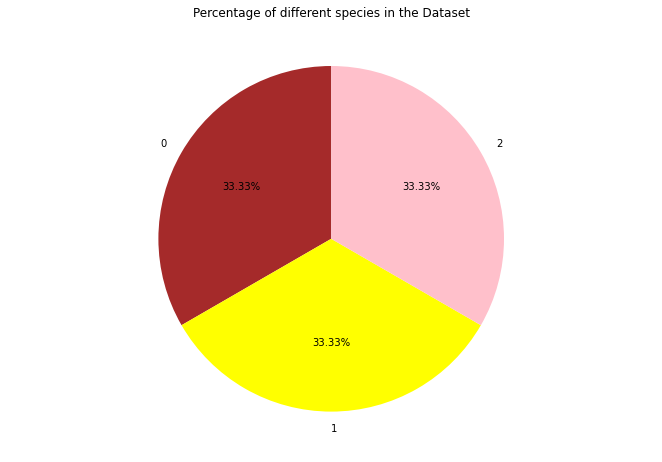

In [19]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['brown','yellow','pink']
sp = data['Species'].unique()
ct = data['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

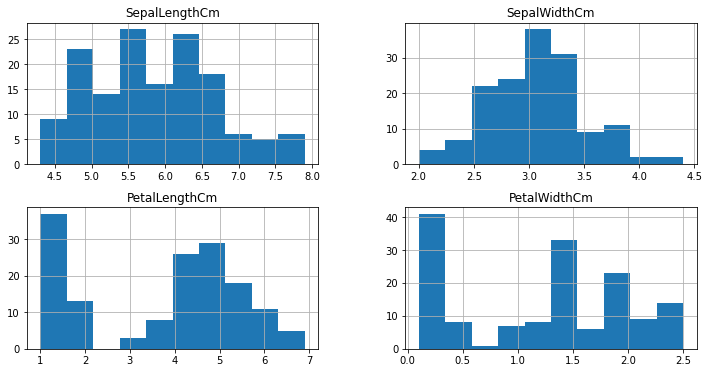

In [20]:
data_set.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

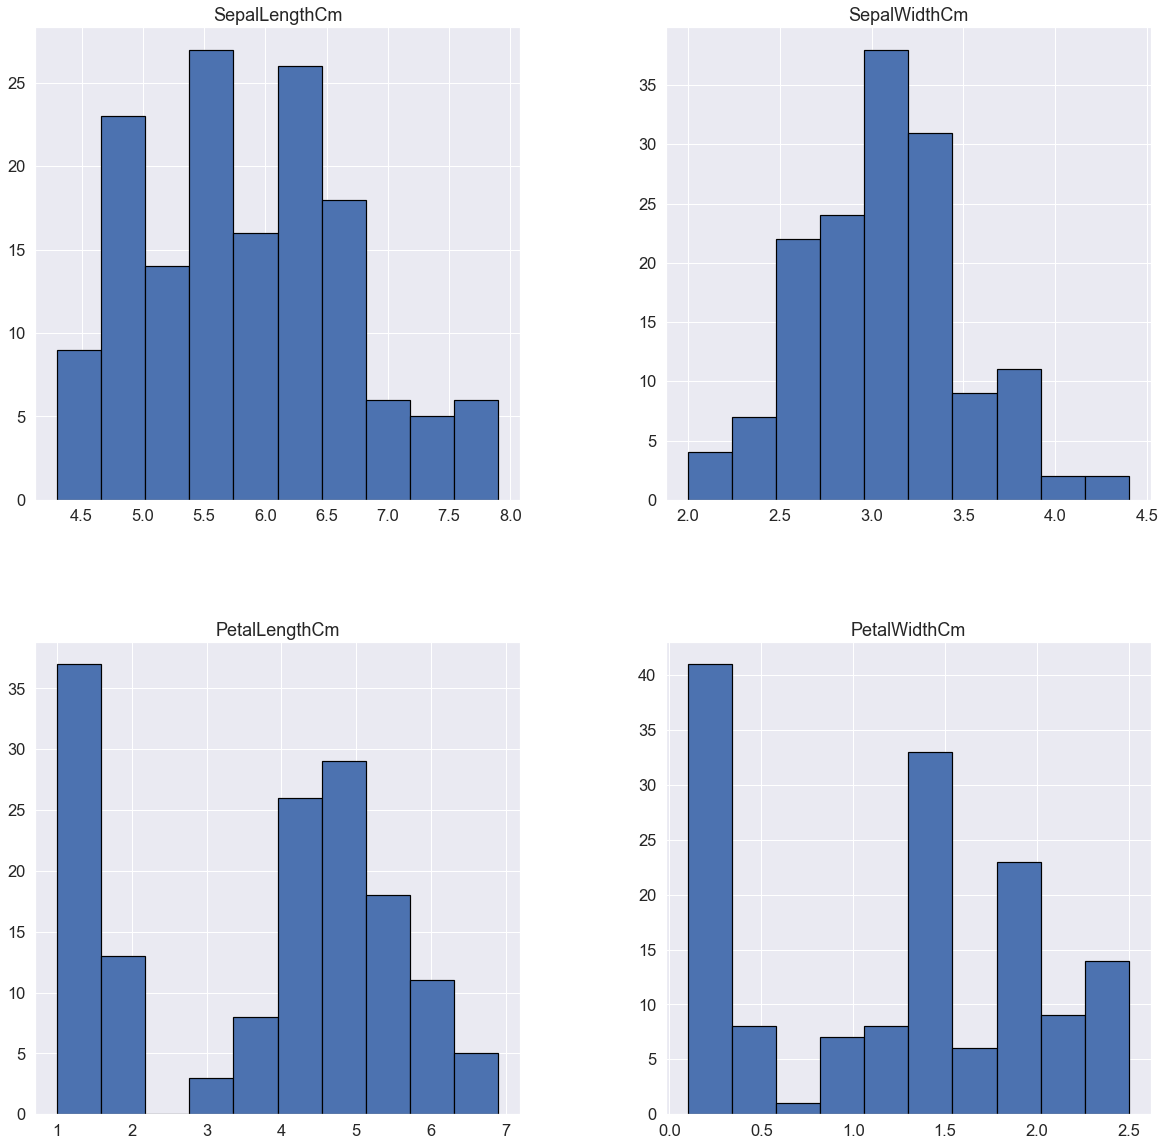

In [21]:
sns.set(font_scale=1.5)
data_set.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

Text(0.5, 1.0, 'Species vs Sepal Length')

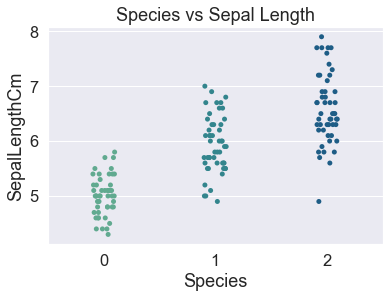

In [22]:
#graph.visualization
sns.stripplot(x='Species', y='SepalLengthCm', data=data, palette='crest')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

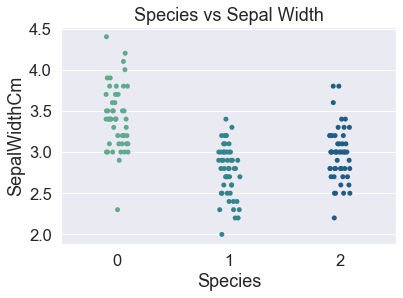

In [23]:
sns.stripplot(x='Species', y='SepalWidthCm', data=data, palette='crest')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

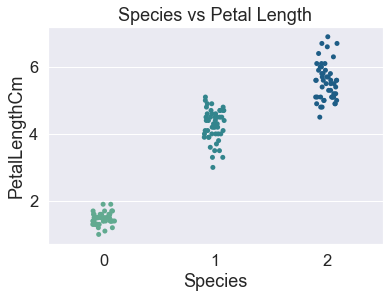

In [24]:
sns.stripplot(x='Species', y='PetalLengthCm', data=data, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

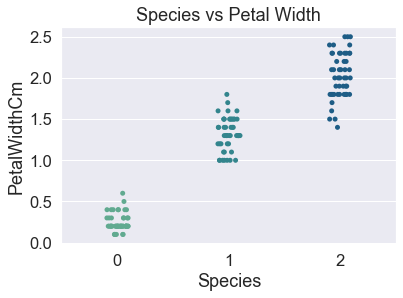

In [25]:
sns.stripplot(x='Species', y='PetalWidthCm', data=data, palette='crest')
plt.title('Species vs Petal Width')

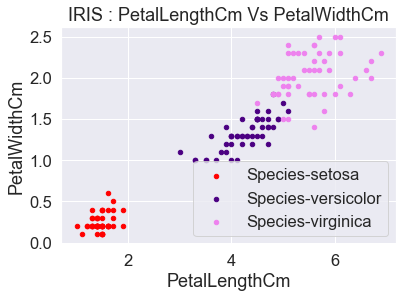

In [26]:
#scatter Plot
plot=data_set[data_set.Species=="Iris-setosa"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='red',label="Species-setosa")
data_set[data_set.Species=="Iris-versicolor"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='indigo',label="Species-versicolor",ax=plot)
data_set[data_set.Species=="Iris-virginica"].plot.scatter(x="PetalLengthCm",y="PetalWidthCm",color='violet',label="Species-virginica",ax=plot)

plt.title("IRIS : PetalLengthCm Vs PetalWidthCm")
plt.show()

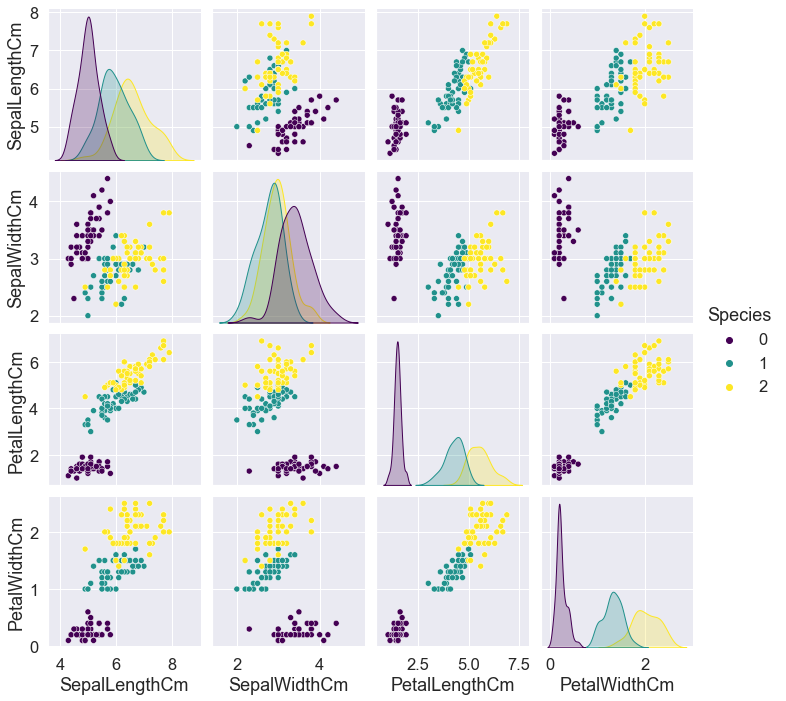

In [27]:
sns.pairplot(data, hue = 'Species',palette='viridis')
plt.show()

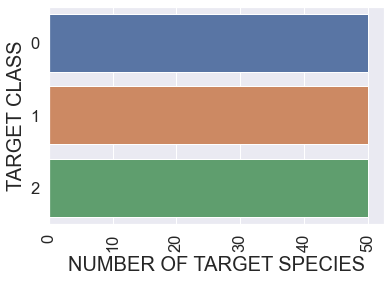

In [28]:
sns.countplot(y=data['Species'],data=data)
plt.xticks(rotation = 90)
plt.ylabel('TARGET CLASS',fontsize=20)
plt.xlabel('NUMBER OF TARGET SPECIES',fontsize=20)
plt.show()

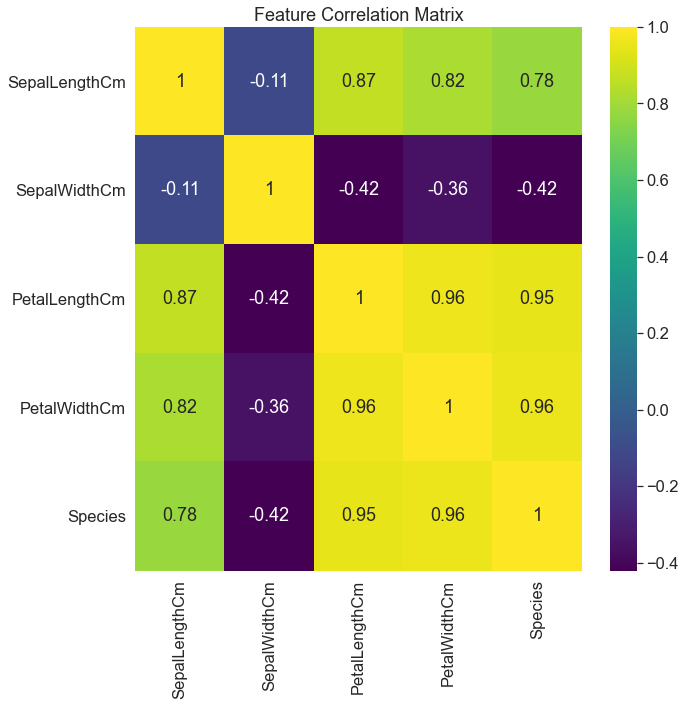

In [29]:
plt.figure(figsize=(10,10))
matrix = data.corr()
corMat = sns.heatmap(matrix, annot=True, cmap="viridis")
corMat.set_title("Feature Correlation Matrix")
plt.show()

In [30]:
x=data_set.drop("Species",axis=1)
x[0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [31]:
y=data_set["Species"]
y[0:10]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [37]:
#Splitting the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
x_train.shape
y_train.shape

(120,)

In [39]:
x_test.shape
y_test.shape

(30,)

In [40]:
from sklearn.tree import DecisionTreeClassifier
pred_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)
pred_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
pred=pred_tree.predict(x_test)

print(pred[0:5])
print(y_test[0:5])

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']
73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: Species, dtype: object


In [42]:
#Checking accuracy
from sklearn import metrics

print( "Accuracy: ", str(metrics.accuracy_score(y_test, pred)*100)+"%")

Accuracy:  100.0%


In [43]:
feature_names = data.columns[:4]
target_names = data['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

[Text(103.01538461538462, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(77.26153846153846, 163.07999999999998, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(128.76923076923077, 163.07999999999998, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(51.50769230769231, 126.83999999999999, 'X[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 90.6, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 90.6, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 126.83999999999999, 'X[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(128.76923076923077, 90.6, 'X[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 54.359999999999985, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 54.359999999999985, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0

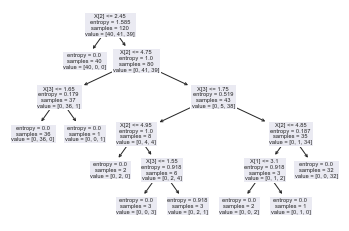

In [45]:
from sklearn import tree
tree.plot_tree(pred_tree)

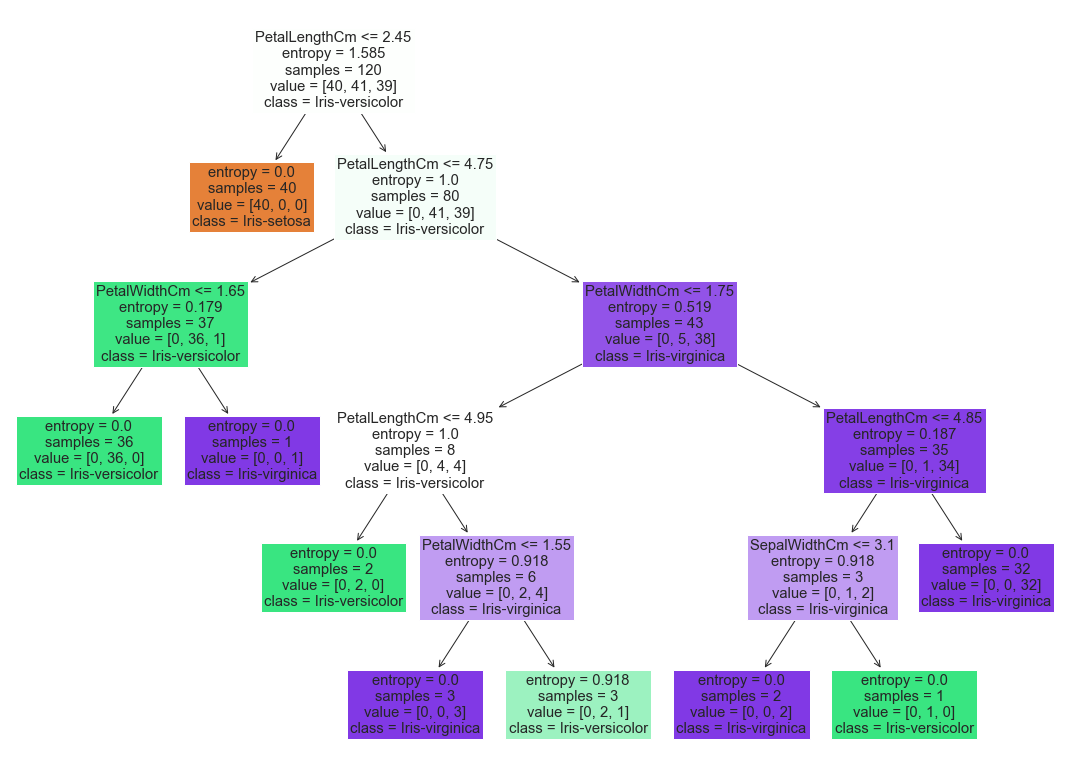

In [46]:
features = data_set.columns[:-1]
classes =data_set['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(pred_tree, feature_names=features, class_names=classes, filled=True)
plt.show()